In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/python-functions-and-documentation-dataset/python_functions_and_documentation_dataset.csv


# Phase I - Dataset Loading and Analysis

In [21]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print('Libraries imported successfully!')

Libraries imported successfully!


In [22]:
# Cell 2: Load the dataset - CORRECTED VERSION
import os

# Check available datasets in Kaggle
print("Available datasets:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Direct path to your CSV file (based on your error message)
dataset_file = '/kaggle/input/python-functions-and-documentation-dataset/python_functions_and_documentation_dataset.csv'

# Load the dataset
print(f"\nLoading dataset from: {dataset_file}")
df = pd.read_csv(dataset_file)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Available datasets:
/kaggle/input/python-functions-and-documentation-dataset/python_functions_and_documentation_dataset.csv

Loading dataset from: /kaggle/input/python-functions-and-documentation-dataset/python_functions_and_documentation_dataset.csv
Dataset loaded successfully!
Shape: (455243, 13)
Columns: ['repo', 'path', 'func_name', 'original_string', 'language', 'code', 'code_tokens', 'docstring', 'docstring_tokens', 'sha', 'url', 'partition', 'summary']


In [23]:
# Cell 3: Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Total number of records: {len(df):,}")
print(f"Total number of features: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== COLUMN INFORMATION ===")
print(df.info())

print("\n=== FIRST 5 ROWS ===")
print(df.head())

=== DATASET OVERVIEW ===
Total number of records: 455,243
Total number of features: 13
Memory usage: 2010.89 MB

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455243 entries, 0 to 455242
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   repo              455243 non-null  object
 1   path              455243 non-null  object
 2   func_name         455241 non-null  object
 3   original_string   455243 non-null  object
 4   language          455243 non-null  object
 5   code              455243 non-null  object
 6   code_tokens       455243 non-null  object
 7   docstring         455243 non-null  object
 8   docstring_tokens  455243 non-null  object
 9   sha               455243 non-null  object
 10  url               455243 non-null  object
 11  partition         455243 non-null  object
 12  summary           455243 non-null  object
dtypes: object(13)
memory usage: 45.2+ MB
No

=== MISSING VALUES ANALYSIS ===
              Column  Missing Count  Missing Percentage
0               repo              0            0.000000
1               path              0            0.000000
2          func_name              2            0.000439
3    original_string              0            0.000000
4           language              0            0.000000
5               code              0            0.000000
6        code_tokens              0            0.000000
7          docstring              0            0.000000
8   docstring_tokens              0            0.000000
9                sha              0            0.000000
10               url              0            0.000000
11         partition              0            0.000000
12           summary              0            0.000000


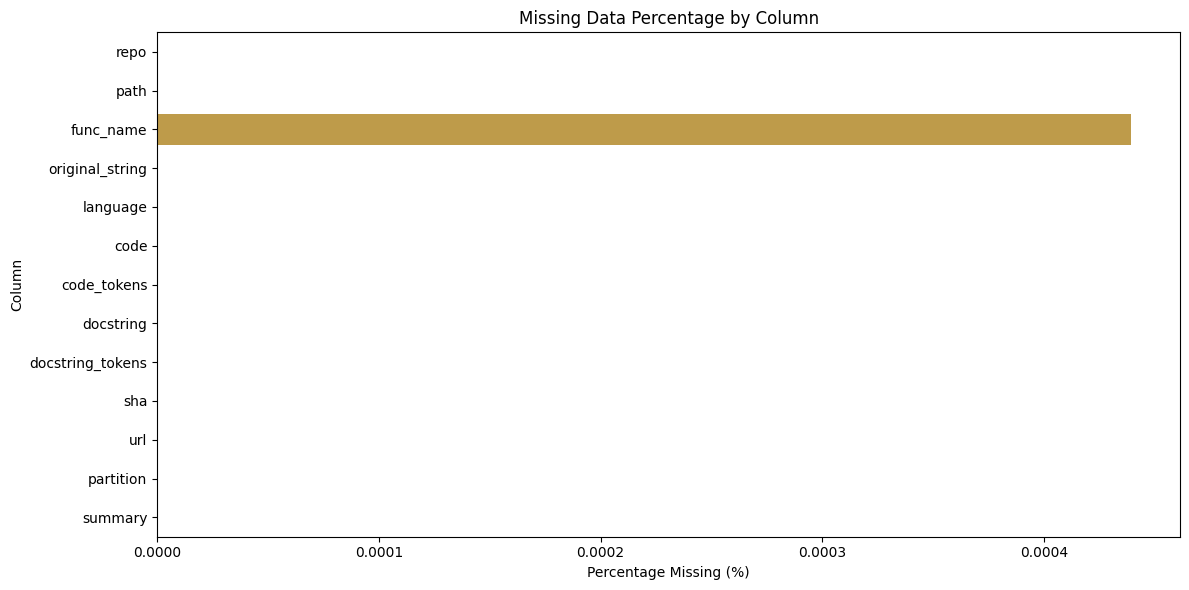

In [24]:
# Cell 4: Check for missing values
print("=== MISSING VALUES ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percentage.values
})

print(missing_df)

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.barplot(data=missing_df, x='Missing Percentage', y='Column')
plt.title('Missing Data Percentage by Column')
plt.xlabel('Percentage Missing (%)')
plt.tight_layout()
plt.show()

=== PARTITION DISTRIBUTION ===
partition
train    410175
valid     22977
test      22091
Name: count, dtype: int64

Percentages:
partition
train    90.10
valid     5.05
test      4.85
Name: count, dtype: float64


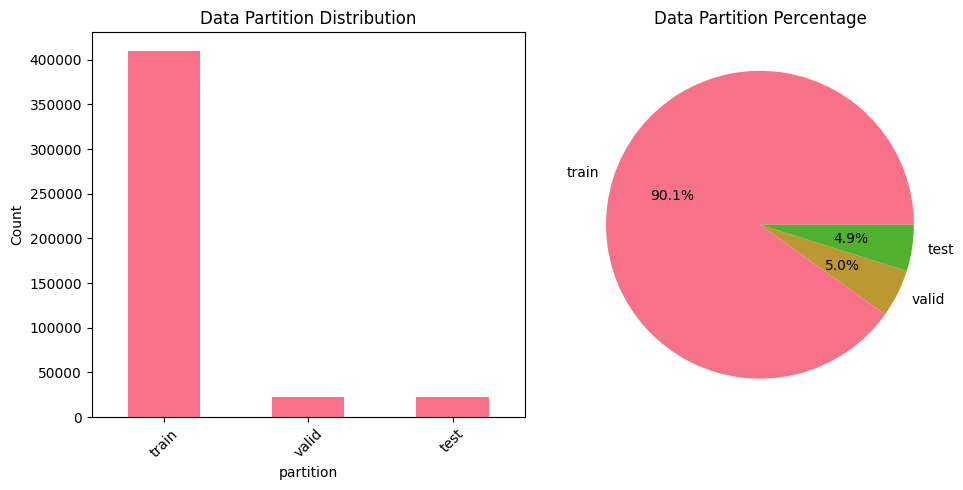

In [25]:
# Cell 5: Analyze partition distribution
print("=== PARTITION DISTRIBUTION ===")
partition_counts = df['partition'].value_counts()
print(partition_counts)
print(f"\nPercentages:")
print((partition_counts / len(df) * 100).round(2))

# Visualize partition distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
partition_counts.plot(kind='bar')
plt.title('Data Partition Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
partition_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Data Partition Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

=== CODE AND DOCSTRING LENGTH ANALYSIS ===
Length Statistics:
         code_length  docstring_length  summary_length
count  455243.000000     455243.000000   455243.000000
mean     1058.562045        297.080588       56.147082
std      1412.836589        556.614936       28.367503
min        75.000000          1.000000        4.000000
25%       397.000000         56.000000       38.000000
50%       666.000000        144.000000       51.000000
75%      1208.000000        340.000000       67.000000
max    103665.000000      46934.000000      350.000000


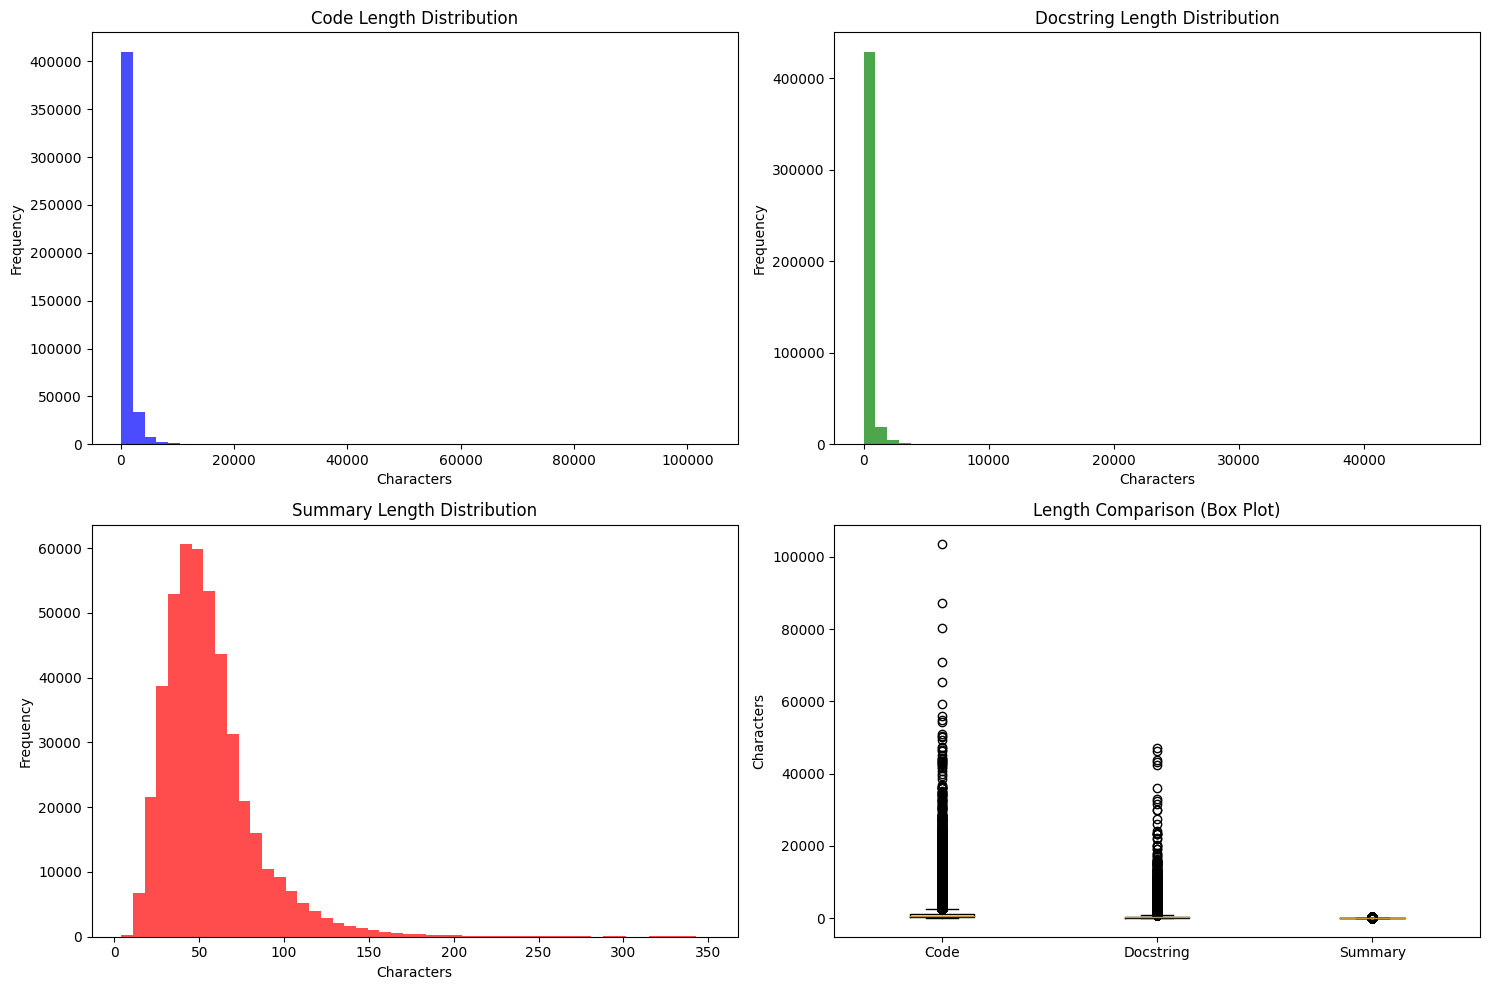

In [26]:
# Cell 6: Analyze code and docstring lengths
print("=== CODE AND DOCSTRING LENGTH ANALYSIS ===")

# Calculate lengths
df['code_length'] = df['code'].str.len()
df['docstring_length'] = df['docstring'].str.len()
df['summary_length'] = df['summary'].str.len()

# Statistical summary
length_stats = df[['code_length', 'docstring_length', 'summary_length']].describe()
print("Length Statistics:")
print(length_stats)

# Visualize length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Code length distribution
axes[0, 0].hist(df['code_length'], bins=50, alpha=0.7, color='blue')
axes[0, 0].set_title('Code Length Distribution')
axes[0, 0].set_xlabel('Characters')
axes[0, 0].set_ylabel('Frequency')

# Docstring length distribution
axes[0, 1].hist(df['docstring_length'], bins=50, alpha=0.7, color='green')
axes[0, 1].set_title('Docstring Length Distribution')
axes[0, 1].set_xlabel('Characters')
axes[0, 1].set_ylabel('Frequency')

# Summary length distribution
axes[1, 0].hist(df['summary_length'], bins=50, alpha=0.7, color='red')
axes[1, 0].set_title('Summary Length Distribution')
axes[1, 0].set_xlabel('Characters')
axes[1, 0].set_ylabel('Frequency')

# Box plot comparison
length_data = [df['code_length'], df['docstring_length'], df['summary_length']]
axes[1, 1].boxplot(length_data, labels=['Code', 'Docstring', 'Summary'])
axes[1, 1].set_title('Length Comparison (Box Plot)')
axes[1, 1].set_ylabel('Characters')

plt.tight_layout()
plt.show()

=== REPOSITORY ANALYSIS ===
Top 10 repositories by function count:
repo
saltstack/salt               11111
mitsei/dlkit                  2551
materialsproject/pymatgen     2196
brocade/pynos                 1918
google/grr                    1903
gem/oq-engine                 1869
tensorflow/tensor2tensor      1765
apple/turicreate              1721
pypa/pipenv                   1716
bitesofcode/projexui          1686
Name: count, dtype: int64


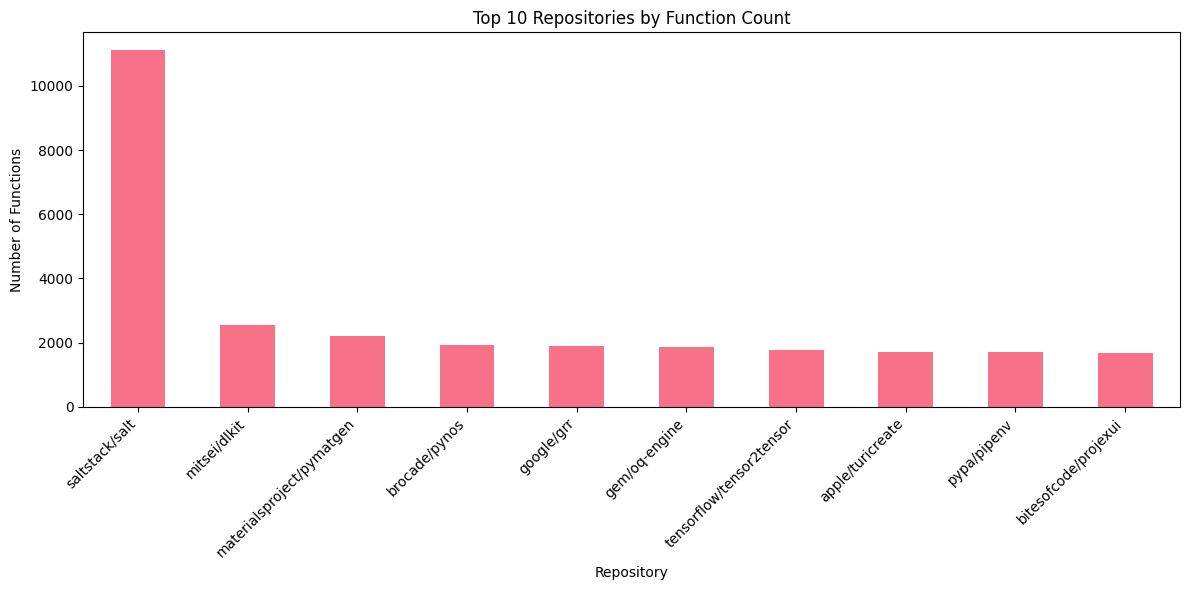


Total unique repositories: 13,581
Average functions per repository: 33.52


In [27]:
# Cell 7: Repository analysis
print("=== REPOSITORY ANALYSIS ===")

# Top repositories by function count
top_repos = df['repo'].value_counts().head(10)
print("Top 10 repositories by function count:")
print(top_repos)

# Visualize top repositories
plt.figure(figsize=(12, 6))
top_repos.plot(kind='bar')
plt.title('Top 10 Repositories by Function Count')
plt.xlabel('Repository')
plt.ylabel('Number of Functions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nTotal unique repositories: {df['repo'].nunique():,}")
print(f"Average functions per repository: {len(df) / df['repo'].nunique():.2f}")

=== FUNCTION NAME ANALYSIS ===
Function name length statistics:
count    455241.000000
mean         20.893413
std          10.468271
min           1.000000
25%          13.000000
50%          20.000000
75%          27.000000
max         134.000000
Name: func_name_length, dtype: float64

Most common function names:
func_name
main        1810
cli          478
run          465
create       333
parse        250
load         249
get          221
init         209
delete       176
validate     165
Name: count, dtype: int64


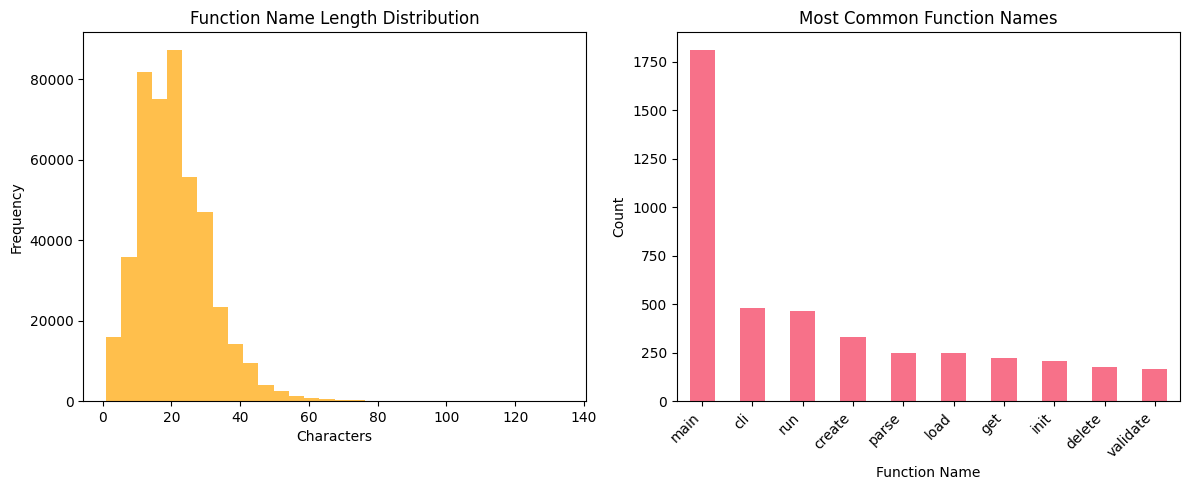

In [28]:
# Cell 8: Function name analysis
print("=== FUNCTION NAME ANALYSIS ===")

# Function name length distribution
df['func_name_length'] = df['func_name'].str.len()
print("Function name length statistics:")
print(df['func_name_length'].describe())

# Most common function name patterns
print("\nMost common function names:")
common_names = df['func_name'].value_counts().head(10)
print(common_names)

# Function name length distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['func_name_length'], bins=30, alpha=0.7, color='orange')
plt.title('Function Name Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
common_names.plot(kind='bar')
plt.title('Most Common Function Names')
plt.xlabel('Function Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [29]:
# Cell 9: Basic text analysis
print("=== TEXT ANALYSIS FOR TOKENIZATION PREPARATION ===")

# Analyze vocabulary in existing tokens (for comparison later)
def analyze_tokens(token_series, name):
    print(f"\n=== {name.upper()} TOKEN ANALYSIS ===")
    
    # Parse token strings (they're likely in string format)
    all_tokens = []
    for token_str in token_series.dropna():
        try:
            # Try to evaluate as Python literal (list)
            tokens = eval(token_str) if isinstance(token_str, str) else token_str
            if isinstance(tokens, list):
                all_tokens.extend(tokens)
        except:
            continue
    
    token_counter = Counter(all_tokens)
    
    print(f"Total tokens: {len(all_tokens):,}")
    print(f"Unique tokens: {len(token_counter):,}")
    print(f"Average tokens per sample: {len(all_tokens) / len(token_series.dropna()):.2f}")
    
    print(f"\nMost common {name} tokens:")
    for token, count in token_counter.most_common(10):
        print(f"  '{token}': {count}")
    
    return token_counter

# Analyze existing tokenization for comparison
code_token_counter = analyze_tokens(df['code_tokens'], 'Code')
docstring_token_counter = analyze_tokens(df['docstring_tokens'], 'Docstring')

=== TEXT ANALYSIS FOR TOKENIZATION PREPARATION ===

=== CODE TOKEN ANALYSIS ===
Total tokens: 53,307,187
Unique tokens: 2,379,872
Average tokens per sample: 117.10

Most common Code tokens:
  '(': 4255286
  ')': 4253916
  '.': 4130244
  ',': 3459990
  '=': 2988654
  ':': 2413674
  'self': 1426124
  '[': 1305618
  ']': 1305455
  'if': 861540

=== DOCSTRING TOKEN ANALYSIS ===
Total tokens: 7,462,871
Unique tokens: 188,022
Average tokens per sample: 16.39

Most common Docstring tokens:
  '.': 505815
  'the': 389467
  'a': 234992
  ':': 225096
  'to': 156483
  'of': 153970
  'and': 95021
  'for': 87610
  '(': 78200
  '-': 76795


In [30]:
# Cell 10: Sample data inspection
print("=== SAMPLE DATA INSPECTION ===")

# Display a few complete examples
for i in range(3):
    print(f"\n--- SAMPLE {i+1} ---")
    print(f"Repository: {df.iloc[i]['repo']}")
    print(f"Function Name: {df.iloc[i]['func_name']}")
    print(f"Partition: {df.iloc[i]['partition']}")
    
    print(f"\nCode (first 200 chars):")
    print(f"'{df.iloc[i]['code'][:200]}...'")
    
    print(f"\nDocstring (first 200 chars):")
    print(f"'{df.iloc[i]['docstring'][:200]}...'")
    
    print(f"\nSummary:")
    print(f"'{df.iloc[i]['summary']}'")
    
    print(f"\nCode tokens (first 10):")
    try:
        code_tokens = eval(df.iloc[i]['code_tokens'])
        print(f"{code_tokens[:10]}")
    except:
        print("Could not parse code tokens")
    
    print("-" * 80)

=== SAMPLE DATA INSPECTION ===

--- SAMPLE 1 ---
Repository: ageitgey/face_recognition
Function Name: train
Partition: train

Code (first 200 chars):
'def train(train_dir, model_save_path=None, n_neighbors=None, knn_algo='ball_tree', verbose=False):
    """
    Trains a k-nearest neighbors classifier for face recognition.

    :param train_dir: dire...'

Docstring (first 200 chars):
'Trains a k-nearest neighbors classifier for face recognition.

    :param train_dir: directory that contains a sub-directory for each known person, with its name.

     (View in source code to see tra...'

Summary:
'Train a k - nearest neighbors classifier for face recognition.'

Code tokens (first 10):
['def', 'train', '(', 'train_dir', ',', 'model_save_path', '=', 'None', ',', 'n_neighbors']
--------------------------------------------------------------------------------

--- SAMPLE 2 ---
Repository: ageitgey/face_recognition
Function Name: predict
Partition: train

Code (first 200 chars):
'def predict(X

In [31]:
# Cell 11: Data quality assessment
print("=== DATA QUALITY REPORT ===")

def assess_data_quality(df):
    report = {
        'total_samples': len(df),
        'complete_samples': len(df.dropna()),
        'missing_code': df['code'].isnull().sum(),
        'missing_docstring': df['docstring'].isnull().sum(),
        'missing_summary': df['summary'].isnull().sum(),
        'empty_code': (df['code'].str.len() == 0).sum(),
        'empty_docstring': (df['docstring'].str.len() == 0).sum(),
        'empty_summary': (df['summary'].str.len() == 0).sum(),
    }
    
    print("Data Quality Metrics:")
    for key, value in report.items():
        if 'total' in key or 'complete' in key:
            print(f"  {key}: {value:,}")
        else:
            percentage = (value / len(df)) * 100
            print(f"  {key}: {value:,} ({percentage:.2f}%)")
    
    return report

quality_report = assess_data_quality(df)

# Calculate usable data percentage
usable_samples = len(df[(df['code'].notna()) & (df['docstring'].notna()) & 
                       (df['summary'].notna()) & (df['code'].str.len() > 0) & 
                       (df['docstring'].str.len() > 0) & (df['summary'].str.len() > 0)])

print(f"\nUsable samples for training: {usable_samples:,} ({usable_samples/len(df)*100:.2f}%)")

=== DATA QUALITY REPORT ===
Data Quality Metrics:
  total_samples: 455,243
  complete_samples: 455,241
  missing_code: 0 (0.00%)
  missing_docstring: 0 (0.00%)
  missing_summary: 0 (0.00%)
  empty_code: 0 (0.00%)
  empty_docstring: 0 (0.00%)
  empty_summary: 0 (0.00%)

Usable samples for training: 455,243 (100.00%)


In [32]:
# Cell 12: Save processed data and analysis results
print("=== SAVING ANALYSIS RESULTS ===")

# Create a clean dataset for the next phases
clean_df = df[(df['code'].notna()) & (df['docstring'].notna()) & 
              (df['summary'].notna()) & (df['code'].str.len() > 0) & 
              (df['docstring'].str.len() > 0) & (df['summary'].str.len() > 0)].copy()

print(f"Original dataset: {len(df):,} samples")
print(f"Clean dataset: {len(clean_df):,} samples")
print(f"Removed: {len(df) - len(clean_df):,} samples ({(len(df) - len(clean_df))/len(df)*100:.2f}%)")

# Save summary statistics
summary_stats = {
    'dataset_info': {
        'total_samples': len(df),
        'clean_samples': len(clean_df),
        'unique_repos': df['repo'].nunique(),
        'train_samples': len(clean_df[clean_df['partition'] == 'train']),
        'test_samples': len(clean_df[clean_df['partition'] == 'test']),
        'valid_samples': len(clean_df[clean_df['partition'] == 'valid'])
    },
    'length_stats': {
        'avg_code_length': clean_df['code_length'].mean(),
        'avg_docstring_length': clean_df['docstring_length'].mean(),
        'avg_summary_length': clean_df['summary_length'].mean(),
        'avg_func_name_length': clean_df['func_name_length'].mean()
    }
}

print("\nDataset ready for Phase 2: BPE Tokenization Implementation!")
print("Next steps:")
print("1. Implement BPE tokenizer from scratch")
print("2. Train separate vocabularies for code and documentation")
print("3. Evaluate against professional tokenization benchmarks")

=== SAVING ANALYSIS RESULTS ===
Original dataset: 455,243 samples
Clean dataset: 455,243 samples
Removed: 0 samples (0.00%)

Dataset ready for Phase 2: BPE Tokenization Implementation!
Next steps:
1. Implement BPE tokenizer from scratch
2. Train separate vocabularies for code and documentation
3. Evaluate against professional tokenization benchmarks


# Phase II - BPE Tokenization Implementation

In [33]:
# Cell 13: BPE Tokenizer Implementation - Base Class
import re
from collections import defaultdict, Counter
import json

class BPETokenizer:
    """
    Byte-Pair Encoding Tokenizer implemented from scratch
    """
    def __init__(self, vocab_size=10000):
        self.vocab_size = vocab_size
        self.word_freqs = {}
        self.splits = {}
        self.merges = {}
        self.vocab = {}
        
    def _get_stats(self, splits):
        """Count frequency of consecutive symbol pairs"""
        pairs = defaultdict(int)
        for word, freq in splits.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[(symbols[i], symbols[i + 1])] += freq
        return pairs
    
    def _merge_vocab(self, pair, splits):
        """Merge all occurrences of the most frequent pair"""
        bigram = re.escape(' '.join(pair))
        p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
        new_splits = {}
        for word in splits:
            new_word = p.sub(''.join(pair), word)
            new_splits[new_word] = splits[word]
        return new_splits
    
    def train(self, texts):
        """Train BPE on a list of texts"""
        print("Training BPE tokenizer...")
        
        # Step 1: Get word frequencies
        self.word_freqs = Counter()
        for text in texts:
            # Basic preprocessing
            words = self._preprocess_text(text)
            self.word_freqs.update(words)
        
        print(f"Found {len(self.word_freqs)} unique words")
        
        # Step 2: Initialize splits (add end-of-word marker)
        self.splits = {}
        for word, freq in self.word_freqs.items():
            self.splits[' '.join(word) + ' </w>'] = freq
        
        # Step 3: Initialize vocabulary with characters
        vocab = set()
        for word in self.word_freqs:
            vocab.update(list(word))
        vocab.add('</w>')  # End-of-word token
        
        # Step 4: Perform BPE merges
        self.merges = {}
        for i in range(self.vocab_size - len(vocab)):
            pairs = self._get_stats(self.splits)
            if not pairs:
                break
                
            best_pair = max(pairs, key=pairs.get)
            self.splits = self._merge_vocab(best_pair, self.splits)
            self.merges[best_pair] = i
            vocab.add(''.join(best_pair))
            
            if (i + 1) % 1000 == 0:
                print(f"Completed {i + 1} merges")
        
        # Step 5: Create final vocabulary
        self.vocab = {token: idx for idx, token in enumerate(sorted(vocab))}
        print(f"Final vocabulary size: {len(self.vocab)}")
        
    def _preprocess_text(self, text):
        """Preprocess text for tokenization"""
        # Convert to lowercase and split into words
        # You can customize this based on whether it's code or documentation
        text = text.lower()
        # For code: preserve special characters, for text: basic word splitting
        words = re.findall(r'\b\w+\b', text)
        return words
    
    def encode(self, text):
        """Encode text using trained BPE"""
        words = self._preprocess_text(text)
        encoded_tokens = []
        
        for word in words:
            if word in self.word_freqs:
                # Apply learned merges
                word_tokens = list(word) + ['</w>']
                word_str = ' '.join(word_tokens)
                
                # Apply merges in order
                for pair in self.merges:
                    bigram = ' '.join(pair)
                    replacement = ''.join(pair)
                    word_str = word_str.replace(bigram, replacement)
                
                tokens = word_str.split()
                encoded_tokens.extend(tokens)
            else:
                # Handle OOV words - split into characters
                encoded_tokens.extend(list(word) + ['</w>'])
        
        return encoded_tokens
    
    def decode(self, tokens):
        """Decode BPE tokens back to text"""
        text = ''.join(tokens).replace('</w>', ' ')
        return text.strip()
    
    def get_vocab_size(self):
        """Return vocabulary size"""
        return len(self.vocab)
    
    def save(self, filepath):
        """Save the tokenizer"""
        data = {
            'vocab_size': self.vocab_size,
            'vocab': self.vocab,
            'merges': [(list(k), v) for k, v in self.merges.items()]
        }
        with open(filepath, 'w') as f:
            json.dump(data, f)
    
    def load(self, filepath):
        """Load the tokenizer"""
        with open(filepath, 'r') as f:
            data = json.load(f)
        
        self.vocab_size = data['vocab_size']
        self.vocab = data['vocab']
        self.merges = {tuple(k): v for k, v in data['merges']}

print("BPE Tokenizer class implemented successfully!")

BPE Tokenizer class implemented successfully!


In [35]:
# Cell 14: Specialized BPE Tokenizers for Code and Documentation

class CodeBPETokenizer(BPETokenizer):
    """BPE Tokenizer specialized for Python code"""
    
    def _preprocess_text(self, text):
        """Code-specific preprocessing"""
        # Preserve Python syntax elements
        # Split on common Python tokens while preserving them
        import re
        
        # Pattern to match Python tokens
        pattern = r'''
            \b\w+\b|           # Words
            \d+\.?\d*|         # Numbers
            [+\-*/=<>!]+|      # Operators
            [(){}\[\].,;:]|    # Punctuation
            \s+|               # Whitespace
            .                  # Any other character
        '''
        
        tokens = re.findall(pattern, text, re.VERBOSE)
        # Filter out pure whitespace tokens but keep meaningful ones
        tokens = [t.strip() for t in tokens if t.strip()]
        return tokens

class DocumentationBPETokenizer(BPETokenizer):
    """BPE Tokenizer specialized for documentation text"""
    
    def _preprocess_text(self, text):
        """Documentation-specific preprocessing"""
        import re
        
        # Clean text preprocessing for natural language
        text = re.sub(r'[^\w\s\-.,;:!?()]', ' ', text)  # Keep basic punctuation
        text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
        text = text.lower().strip()
        
        # Split into words and punctuation
        words = re.findall(r'\b\w+\b|[.,;:!?()]', text)
        return words

print("Specialized tokenizers implemented successfully!")

Specialized tokenizers implemented successfully!


In [39]:
# Cell 15: Train BPE Tokenizers on the Dataset

# Sample a subset for initial training (you can increase this later)
print("Preparing training data...")

# Sample data for faster initial training
sample_size = 50000  # Start with 50k samples, increase if needed
train_data = clean_df[clean_df['partition'] == 'train'].sample(n=sample_size, random_state=42)

print(f"Training on {len(train_data)} samples")

# Extract texts for training
code_texts = train_data['code'].tolist()
docstring_texts = train_data['docstring'].tolist()
summary_texts = train_data['summary'].tolist()

# Initialize tokenizers
code_tokenizer = CodeBPETokenizer(vocab_size=8000)
doc_tokenizer = DocumentationBPETokenizer(vocab_size=5000)
combined_tokenizer = DocumentationBPETokenizer(vocab_size=10000)  # For summaries

print("Training code tokenizer...")
code_tokenizer.train(code_texts)

print("\nTraining documentation tokenizer...")
doc_tokenizer.train(docstring_texts)

print("\nTraining combined tokenizer...")
combined_texts = docstring_texts + summary_texts
combined_tokenizer.train(combined_texts)

print("\nAll tokenizers trained successfully!")

Preparing training data...
Training on 50000 samples
Training code tokenizer...
Training BPE tokenizer...
Found 319681 unique words
Completed 1000 merges
Completed 2000 merges
Completed 3000 merges
Completed 4000 merges
Completed 5000 merges
Completed 6000 merges
Final vocabulary size: 8000

Training documentation tokenizer...
Training BPE tokenizer...
Found 83757 unique words
Completed 1000 merges
Completed 2000 merges
Completed 3000 merges
Final vocabulary size: 5000

Training combined tokenizer...
Training BPE tokenizer...
Found 85146 unique words
Completed 1000 merges
Completed 2000 merges
Completed 3000 merges
Completed 4000 merges
Completed 5000 merges
Completed 6000 merges
Completed 7000 merges
Completed 8000 merges
Final vocabulary size: 10000

All tokenizers trained successfully!


In [41]:
# Cell 16: Test the BPE Tokenizers

# Test with sample data
test_code = clean_df.iloc[0]['code']
test_docstring = clean_df.iloc[0]['docstring']
test_summary = clean_df.iloc[0]['summary']

print("=== TESTING BPE TOKENIZERS ===")

print("\nOriginal Code:")
print(test_code[:200] + "...")

print("\nCode BPE Tokens:")
code_tokens = code_tokenizer.encode(test_code)
print(code_tokens[:20])
print(f"Total tokens: {len(code_tokens)}")

print("\nOriginal Docstring:")
print(test_docstring[:200] + "...")

print("\nDocstring BPE Tokens:")
doc_tokens = doc_tokenizer.encode(test_docstring)
print(doc_tokens[:20])
print(f"Total tokens: {len(doc_tokens)}")

print("\nOriginal Summary:")
print(test_summary)

print("\nSummary BPE Tokens:")
summary_tokens = combined_tokenizer.encode(test_summary)
print(summary_tokens)
print(f"Total tokens: {len(summary_tokens)}")

# Test decoding
print("\n=== TESTING DECODING ===")
decoded_code = code_tokenizer.decode(code_tokens[:20])
print("Decoded code (first 20 tokens):", decoded_code)

decoded_doc = doc_tokenizer.decode(doc_tokens[:20])
print("Decoded docstring (first 20 tokens):", decoded_doc)

=== TESTING BPE TOKENIZERS ===

Original Code:
def train(train_dir, model_save_path=None, n_neighbors=None, knn_algo='ball_tree', verbose=False):
    """
    Trains a k-nearest neighbors classifier for face recognition.

    :param train_dir: dire...

Code BPE Tokens:
['def</w>', 'train</w>', '(</w>', 't', 'r', 'a', 'i', 'n', '_', 'd', 'i', 'r', '</w>', ',</w>', 'm', 'o', 'd', 'e', 'l', '_']
Total tokens: 1052

Original Docstring:
Trains a k-nearest neighbors classifier for face recognition.

    :param train_dir: directory that contains a sub-directory for each known person, with its name.

     (View in source code to see tra...

Docstring BPE Tokens:
['trains</w>', 'a</w>', 'k</w>', 'nearest</w>', 'neighbors</w>', 'classifier</w>', 'for</w>', 'face</w>', 'recogn', 'ition</w>', '.</w>', ':</w>', 'param</w>', 't', 'r', 'a', 'i', 'n', '_', 'd']
Total tokens: 254

Original Summary:
Train a k - nearest neighbors classifier for face recognition.

Summary BPE Tokens:
['train</w>', 'a</w>',